<a href="https://colab.research.google.com/github/cserik/DeepLearningNHF/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
from tempfile import TemporaryFile
from numpy import savez_compressed

**<--------Copy kaggle.json file from github to files tab(content directory)**

---



In [ ]:
#our dataset is from kaggle
!pip install kaggle

In [ ]:
#we created an API token for kaggle (kaggle.json file)
#make a directory with a name : kaggle
!mkdir ~/.kaggle

In [ ]:
#copy kaggle.json file to kaggle 
!cp kaggle.json ~/.kaggle/

In [ ]:
#change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download the dataset from kaggle
!kaggle datasets download -d badasstechie/celebahq-resized-256x256

 99% 281M/283M [00:02<00:00, 146MB/s]
100% 283M/283M [00:02<00:00, 141MB/s]


In [ ]:
!unzip celebahq-resized-256x256.zip

In [ ]:
base_dir = 'celeba_hq_256' 

#get the name of the images
train_fnames = os.listdir(base_dir)
print(train_fnames[:10])

['27695.jpg', '19246.jpg', '02781.jpg', '11588.jpg', '13321.jpg', '05725.jpg', '02495.jpg', '08125.jpg', '10910.jpg', '10948.jpg']


In [ ]:
image_count = len(train_fnames)
print("Number of images:" ,image_count)

Number of images: 30000


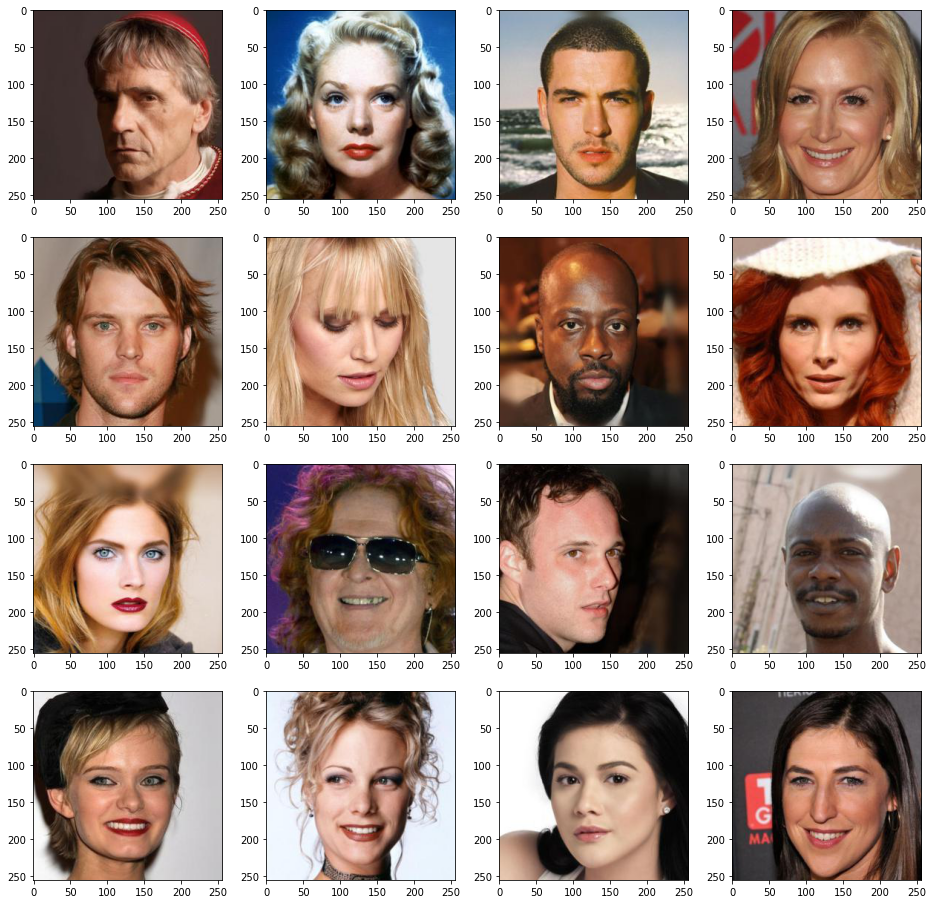

In [ ]:
#plot some images from the dataset
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_images = [os.path.join(base_dir, fname) for fname in train_fnames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
# load an image as an rgb numpy array
def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB
	image = image.convert('RGB')
	# convert to array
	pixels = np.asarray(image)
	return pixels

In [ ]:
# load images to array
def load_to_array(directory, size):
	faces = list()
	# enumerate files
	for filename in os.listdir(directory):
		# load the image
		pixels = load_image(directory +'/'+ filename)
		# store
		faces.append(pixels)
		#print(len(faces), face.shape)
		if len(faces) >= size:
			break
	return np.asarray(faces)

In [ ]:
# load and extract all faces
all_faces = load_to_array(base_dir, 30000)
print('Loaded: ', all_faces.shape)

Loaded:  (30000, 256, 256, 3)


In [ ]:
#We were not sure if we need a test or validation set for this task. 
#It might be useful to test the discriminator's ability to distinguish fake and true cases on new data it has never seen before.
test_split=0.2
nb_samples=image_count
train_faces=all_faces[0:int(nb_samples*(1-test_split))]
print(train_faces.shape)
test_faces=all_faces[int(nb_samples*(1-test_split)):]
print(test_faces.shape)

(24000, 256, 256, 3)
(6000, 256, 256, 3)


In [ ]:
#save numpy.ndarray for later
savez_compressed('img_celeba_256.npz', all_faces)

In [ ]:
# generate mini batch
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images and normalization
	X = normalize(dataset[ix])
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X, y

In [ ]:
#mini batch example
batch_size=50
mini_batch=generate_real_samples(all_faces, batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


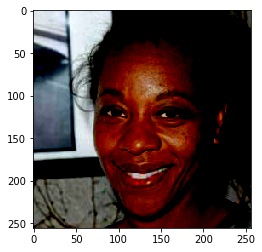

In [ ]:
#plot normalized image
plt.imshow(mini_batch[0][7], interpolation='nearest')
plt.show()

In [ ]:
#down sample picture to any 
pic=mini_batch[0][7]
input_size = 256
output_size = 128
bin_size = input_size // output_size
small_image = pic.reshape((output_size, bin_size, 
                                   output_size, bin_size, 3)).max(3).max(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


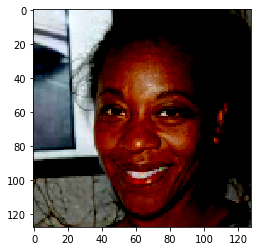

In [ ]:
plt.imshow(small_image, interpolation='nearest')
plt.show()